Epoch 1/30
375/375 - 1s - loss: 0.4254 - accuracy: 0.8798 - val_loss: 0.2057 - val_accuracy: 0.9414 - 964ms/epoch - 3ms/step
Epoch 2/30
375/375 - 0s - loss: 0.1790 - accuracy: 0.9477 - val_loss: 0.1537 - val_accuracy: 0.9563 - 480ms/epoch - 1ms/step
Epoch 3/30
375/375 - 0s - loss: 0.1339 - accuracy: 0.9610 - val_loss: 0.1346 - val_accuracy: 0.9629 - 459ms/epoch - 1ms/step
Epoch 4/30
375/375 - 0s - loss: 0.1064 - accuracy: 0.9690 - val_loss: 0.1154 - val_accuracy: 0.9672 - 456ms/epoch - 1ms/step
Epoch 5/30
375/375 - 0s - loss: 0.0899 - accuracy: 0.9733 - val_loss: 0.1099 - val_accuracy: 0.9688 - 461ms/epoch - 1ms/step
Epoch 6/30
375/375 - 0s - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.1151 - val_accuracy: 0.9674 - 471ms/epoch - 1ms/step
Epoch 7/30
375/375 - 0s - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.1027 - val_accuracy: 0.9702 - 469ms/epoch - 1ms/step
Epoch 8/30
375/375 - 0s - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.1046 - val_accuracy: 0.9686 - 467ms/epoch - 1ms/step


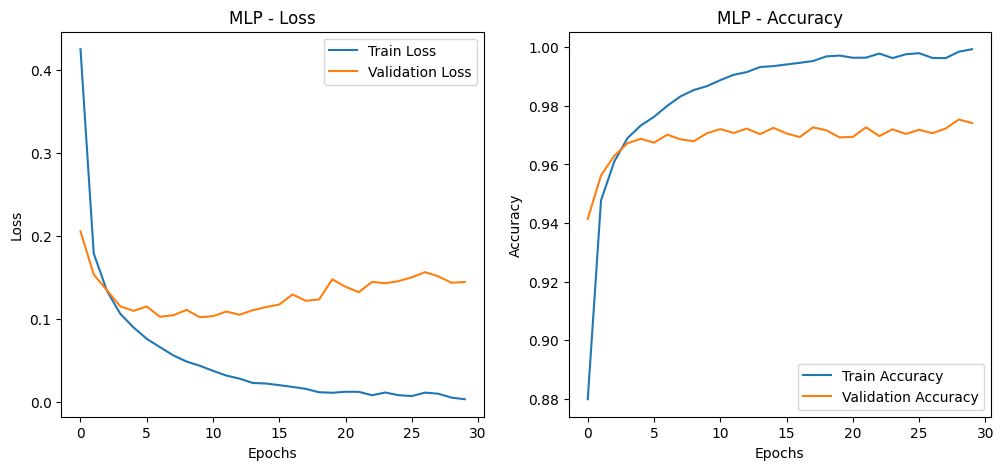

Test Loss: 0.12282770872116089, Test Accuracy: 0.9764000177383423


In [2]:
# Этап 1: MLP для распознавания изображений из MNIST
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Загрузка и нормализация данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Преобразование меток в one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Построение модели
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Обучение модели
history_mlp = mlp_model.fit(x_train, y_train_cat,
                            validation_split=0.2,
                            epochs=30,
                            batch_size=128,
                            verbose=2)


# Графики обучения
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Потери
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Точность
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


# Построение графиков
plot_training_history(history_mlp, "MLP")

# Оценка модели на тестовых данных
test_loss, test_acc = mlp_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


Epoch 1/30
375/375 - 6s - loss: 0.1689 - accuracy: 0.9475 - val_loss: 0.0542 - val_accuracy: 0.9844 - 6s/epoch - 15ms/step
Epoch 2/30
375/375 - 3s - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0492 - val_accuracy: 0.9857 - 3s/epoch - 8ms/step
Epoch 3/30
375/375 - 3s - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0425 - val_accuracy: 0.9880 - 3s/epoch - 8ms/step
Epoch 4/30
375/375 - 3s - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0460 - val_accuracy: 0.9872 - 3s/epoch - 8ms/step
Epoch 5/30
375/375 - 3s - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0475 - val_accuracy: 0.9872 - 3s/epoch - 9ms/step
Epoch 6/30
375/375 - 3s - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0455 - val_accuracy: 0.9877 - 3s/epoch - 9ms/step
Epoch 7/30
375/375 - 3s - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0518 - val_accuracy: 0.9871 - 3s/epoch - 8ms/step
Epoch 8/30
375/375 - 3s - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0512 - val_accuracy: 0.9868 - 3s/epoch - 8ms/step
Epoch 9/30
375/375 - 3s

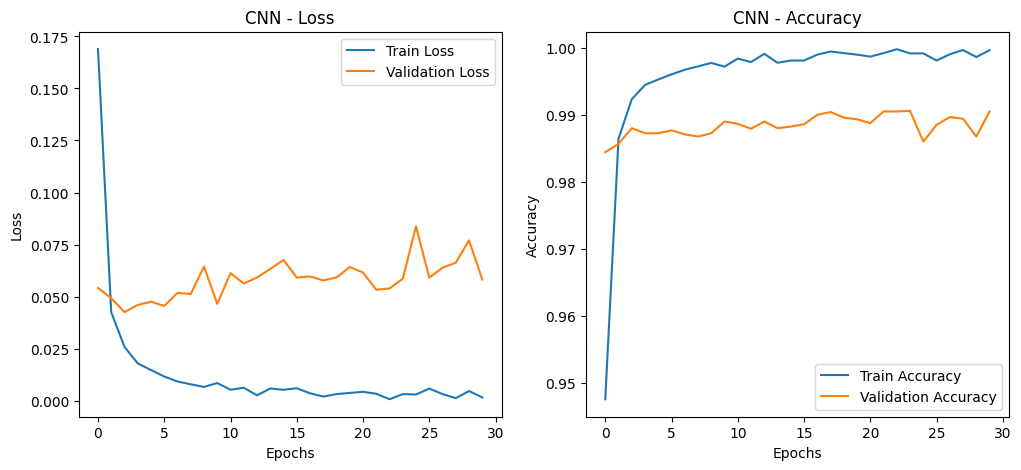

Test Loss: 0.0435822494328022, Test Accuracy: 0.9908999800682068


In [1]:
# Этап 2: CNN для распознавания изображений из MNIST
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Графики обучения
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Потери
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Точность
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


# Загрузка и нормализация данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Преобразование формы для сверточной сети
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Преобразование меток в one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Построение модели
cnn_model = Sequential([
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Обучение модели
history_cnn = cnn_model.fit(x_train_cnn, y_train_cat,
                            validation_split=0.2,
                            epochs=30,
                            batch_size=128,
                            verbose=2)

# Построение графиков
plot_training_history(history_cnn, "CNN")

# Оценка модели на тестовых данных
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")
